In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import torch
import os
from PIL import Image

In [ ]:
# Assuming you have a dataframe with columns: 'image_url', 'channel', 'cell_count'
df = pd.read_csv('your_data.csv') # Replace 'your_data.csv' with the path to your CSV file

array([[226, 250, 324, ..., 147, 153, 151],
       [224, 248, 308, ..., 158, 151, 155],
       [238, 236, 288, ..., 147, 150, 155],
       ...,
       [153, 144, 144, ..., 157, 157, 154],
       [149, 155, 140, ..., 152, 155, 143],
       [154, 146, 151, ..., 164, 149, 157]], dtype=uint16)

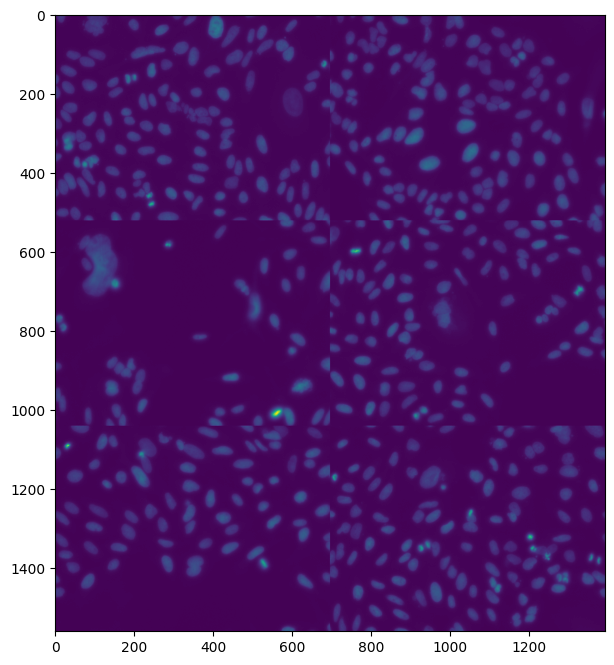

In [ ]:
# Split data into training and testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
class CellDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        dataframe: DataFrame containing the image file paths and cell counts.
        transform: PyTorch transforms to apply to the images.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['Hoechst']
        image = Image.open(img_path)
        cell_count = self.dataframe.iloc[idx]['cell_count']
        if self.transform:
            image = self.transform(image)
        return image, cell_count


In [3]:
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
# ])


In [ ]:
train_dataset = CellDataset(dataframe=train_df, transform=transform)
test_dataset = CellDataset(dataframe=test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

## Defining the CNN Model for Regression

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CellCountCNN(nn.Module):
    def __init__(self):
        super(CellCountCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 512)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 64 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


## Step 3: Training the Model

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CellCountCNN().to(device)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for images, counts in train_loader:
#         images, counts = images.to(device), counts.to(device).view(-1, 1).float()
        
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, counts)
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
#     print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

## Step 4: Evaluating the Model's Performance

In [ ]:
# model.eval()
# total_loss = 0.0
# with torch.no_grad():
#     for images, counts in test_loader:
#         images, counts = images.to(device), counts.to(device).view(-1, 1).float()
#         outputs = model(images)
#         loss = criterion(outputs, counts)
#         total_loss += loss.item()
# print(f"Test Loss: {total_loss/len(test_loader)}")